<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/3_Associated_Legendre_polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Associated Legendre polynomials

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences, submitted.
<br>
<br>

####Legendre's equation

\begin{equation}
  (1\,-\,x^2)\,\frac{d^2}{{dx}^2}\,f\,(x)\,-\,2x\,\frac{d}{dx}\,f\,(x)
  \,+\,\left[n\,(n\,+\,1)\,-\,\frac{m^2}{1\,-\,x^2}\right]f\,(x)
  \,=\,0
\end{equation}
<br>
<br>
The solutions to the *Legendre's equation* in the interval $-1\,\le\,x\,\le\,1$ are the *Legendre functions* of degree $n$ and order $m$:
<br>
<br>
\begin{equation}
  P_{n}^{m}\,(x)
  \,=\,\frac{(-1)^m}{2^n n!}\,\left(1\,-\,x^2\right)^{m/2}\,\left(\frac{d}{dx}\right)^{n\,+\,m}\left(x^2\,-\,1\right)^n\qquad 0\,\le\,m\,\le\,n\quad m,\,n \in \mathbb{N}
\end{equation}
<br>
<br>
These functions satisfy the fixed-order orthonormality relation:
<br>
<br>
\begin{split}
  \int_{-1}^{1} P_{n}^{m}\,(x)\,P_{n'}^{m}\,(x)\,dx
  \,=\,
  \begin{cases}
    \displaystyle 1 \quad \text{if}\quad n\,\ne\,n'\\\\
    \displaystyle \frac{2}{2n\,+\,1}\frac{(n\,+\,m)!}{(n\,-\,m)!}\quad \text{otherwise}
  \end{cases}
\end{split}
<br>
<br>
When $m\,=\,0$ the functions reduce to the ordinary *Legedre polynomials* given by the *Rodrigues' formula*:
<br>
<br>
\begin{equation}
  P_n\,(x)
  \,=\,\frac{1}{2^n n!}\,\left(\frac{d}{dx}\right)^n\left(x^2\,-\,1\right)^n
\end{equation}
<br>
<br>
which obey the orthonormality relation:
<br>
<br>
\begin{split}
  \int_{-1}^{1} P_{n}\,(x)\,P_{n'}\,(x)\,dx
  \,=\,
  \begin{cases}
    \displaystyle 1 \quad \text{if}\quad n\,\ne\,n'\\\\
    \displaystyle \frac{2}{2n\,+\,1}\quad \text{otherwise}
  \end{cases}
\end{split}
<br>
<br>
The *Legendre polynomials* can also be calculated via recursion (*Bonnet formula*) such as:
<br>
<br>
\begin{split}
    & P_0
    = 1 \\
    & P_1
    = x \\
    & P_n\,(x)
    = \frac{(2n\,-\,1)\,x\, P_{n\,-\,1}\,(x)\,-\,(n\,-\,1)\,P_{n\,-\,2}\,(x)}{n}\qquad n \geq 2
\end{split}

In [ ]:
def lgPn (n, x):
  """
  Evaluates P_{n}(x) using an iterative algorithm
  """
  if n == 0:
    
    return np.ones (x.size)
  
  elif n == 1:
    
    return x

  else:

    fPn = np.ones (x.size); sPn = x.copy (); nPn = np.empty (x.size)

    for i in range (2, n + 1):

      nPn = ((2 * i - 1) * x * sPn - (i - 1) * fPn) / i

      fPn = sPn; sPn = nPn

    return nPn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the parameters below

# N: number of points

# nmax: maximum degree

if __name__ == "__main__":

  N = 1000
  
  nmax = 9

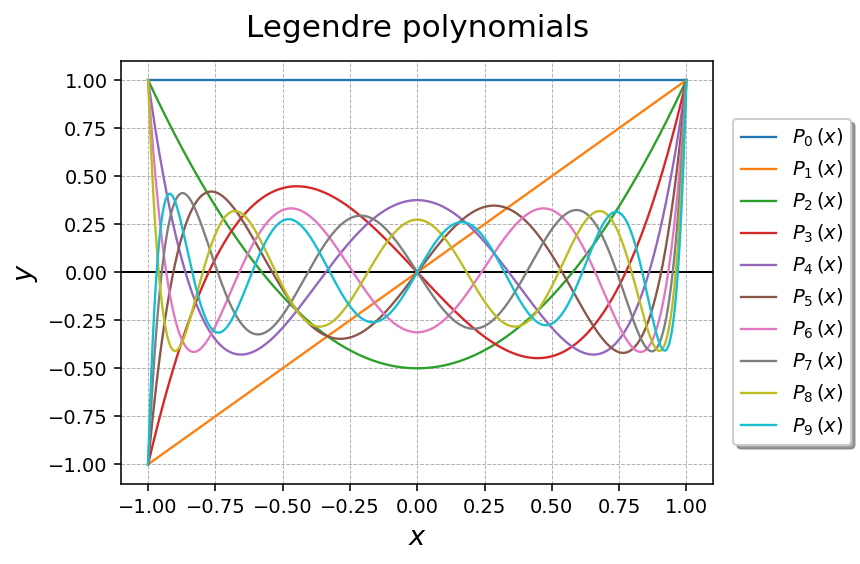

In [ ]:
if __name__ == "__main__":

  x = np.linspace (-1, 1, N)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  for n in range (nmax + 1):

    plt.plot (x, lgPn (n, x), label = r'$P_{{{}}}\,(x)$'.format (n),
              linewidth = 1.2, zorder = 3)
  
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 2)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('Legendre polynomials', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####Expansions in Legendre polynomials

The *Legendre polynomials* form a complete set on the interval $[-1,\,1]$ and may be used to expand any piecewise smooth function. Their orthogonality properties allow for an easy calculation the coefficients via integration, just like the coefficients for the *Fourier series*:
<br>
<br>
\begin{equation}
  f\,(x)
  \,=\,\sum_{n\,=\,0}^\infty c_n\,P_n\,(x)
  \qquad\qquad c_n
  \,=\,\frac{2n\,+\,1}{2} \int_{-1}^1 f\,(x)\,P_n\,(x)\,dx
\end{equation}
<br>
<br>

In [ ]:
from scipy.integrate import simps

In [ ]:
def coefficients (nmax, f, x):
  """
  Evaluates c_{n}
  """
  c = np.zeros (nmax + 1)

  for n in range (nmax + 1):

    c[n] = 0.5 * (2 * n + 1) * simps (f (x) * lgPn (n, x), x)

  return c


def sPn (nmax, c, x):
  """
  Evaluates S(x)
  """
  s = np.zeros (x.size)

  for n in range (nmax + 1):

    s += c[n] * lgPn (n, x)
  
  return s

In [ ]:
# Uncomment one of the following functions or define your own

if __name__ == "__main__":

  f = lambda x: 1.8 * np.cos (np.pi * x) +\
                1.5 * np.sin (1.5 * np.pi * x) +\
                1.7 * np.cos (2.7 * np.pi * x)

#  f = lambda x: 3.0 * x * np.sin (0.9 * np.pi * x) +\
#                2.7 * (x ** 2) * np.cos (1.5 * np.pi * x) +\
#                3.2 * (x ** 3) * np.cos (2.1 * np.pi * x)

#  f = lambda x: 2.3 * np.sin (2.5 * np.pi * x) +\
#                np.exp (-x ** 2) * np.cos (1.7 * np.pi * (x - 0.3))

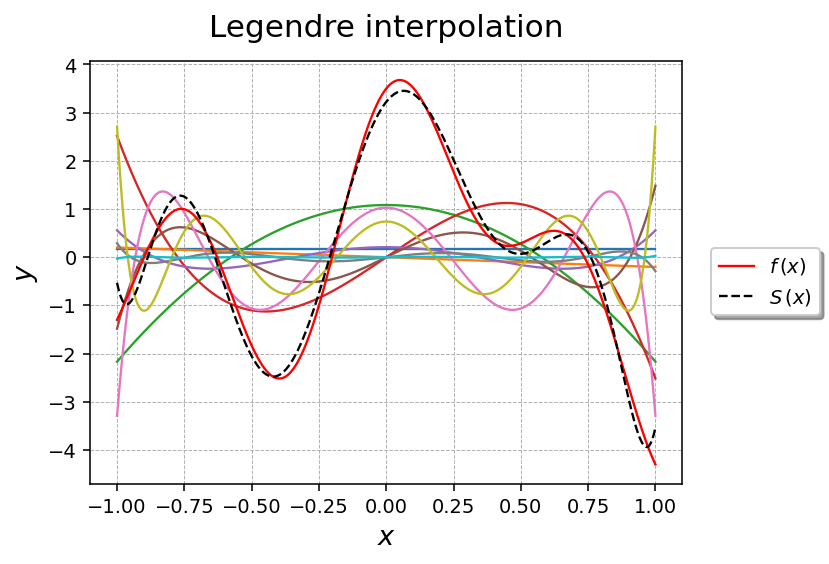

In [ ]:
if __name__ == "__main__":

  c = coefficients (nmax, f, x)
  s = sPn (nmax, c, x)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  for n in range (nmax + 1):

    plt.plot (x, c[n] * lgPn (n, x), linewidth = 1.2)

  plt.plot (x, f (x), color = 'red', linewidth = 1.2, label = r'$f\,(x)$')
  plt.plot (x, s, color = 'black', linestyle = 'dashed', linewidth = 1.2,
            label = r'$S\,(x)$')
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('Legendre interpolation', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####Computing the associated Legendre functions

There are many methods to compute the associated Legendre polynomials. For the $m\,=\,0$, case, we can apply the recursive scheme suggested above. For the case $m\,>\,0$, we shall use an algorithm inspired in the one proposed by *Wiggins & Saito (1971)*, which is both efficient and accurate.
<br>
<br>
The idea is using the exact analytic expression below to compute the diagonal terms:
<br>
<br>
\begin{equation}
  P_{n}^{n}\,(x)
  \,=\,(-1)^n\,(2n\,-\,1)!!\,\left(1\,-\,x^2\right)^{\frac{n}{2}},
\end{equation}
<br>
where $!!$ denotes the double factorial.
<br>
<br>
Then, we can apply the following recurrence formula to calculate the terms below de diagonal:
<br>
<br>
\begin{equation}
  P_{n\,+\,1}^{n}\,(x)
  \,=\,x\,(2n\,+\,1)\,P_{n}^{n}\,(x)
\end{equation}
<br>
<br>
Finally, we apply this last recursion (*Hobson*, p. 107) to calculate all the remaining terms:
<br>
<br>
\begin{equation}
  P_{n}^{m}\,(x)
  \,=\,\frac{-2(m + 1)\,\alpha\,(x)\,P_{n}^{m\,+\,1}\,(x)
  \,-\,
  P_{n}^{m\,+\,2}\,(x)}{(n\,-\,m)\,(n\,+\,m\,+\,1)}
  \qquad\alpha\,(x)
  \,=\,
  \begin{cases}
    \displaystyle \frac{x}{\sqrt{1\,-\,x^2}} \quad \text{if}\quad |x|\,<\,1\\\\
    \displaystyle 0 \quad \text{if}\quad |x|\,=\,1
  \end{cases}
\end{equation}
<br>
<br>

In [ ]:
# Set the parameters below

# N: number of points

# nmax: maximum degree

if __name__ == "__main__":

  N = 1000

  nmax = 5

In [ ]:
from scipy.special import factorial2

In [ ]:
def lgPmn (nmax, x):
  """
  Evaluates P_{m,n}(x) for all n <= nmax and all m <= n
  """
  N = x.size

  P = np.zeros ((nmax + 1, nmax + 1, N))

  s = np.zeros (N)
  c = np.zeros (N)

  s[1:-1] = np.sqrt (1 - x[1:-1] ** 2)
  c[1:-1] = x[1:-1] / s[1:-1]

  P[0, 0] = np.ones (N)

  if nmax > 0:

    P[0, 1] = x.copy ()
    P[1, 1] = -s

  for n in range (2, nmax + 1):

    P[0, n] = ((2 * n - 1) * x * P[0, n - 1] - (n - 1) * P[0, n - 2]) / n
    P[n, n] = (-1) ** n * factorial2 (2 * n - 1) * s ** n
  
  for n in range (1, nmax):

    P[n, n + 1] = x * (2 * n + 1) * P[n, n]

    for m in range (n - 1, 0, -1):

      P[m, n + 1] = (-2.0 * (m + 1) * c * P[m + 1, n + 1]\
                     - P[m + 2, n + 1]) / ((n - m + 1) * (n + m + 2))

  return P

In [ ]:
def fixAxis (axs, nmax):
    """
    Set axis to the appropriate format
    """
    axs = axs.flat

    for ax in axs[nmax + 1:]:
    
        ax.remove ()

    return axs[:nmax + 1]

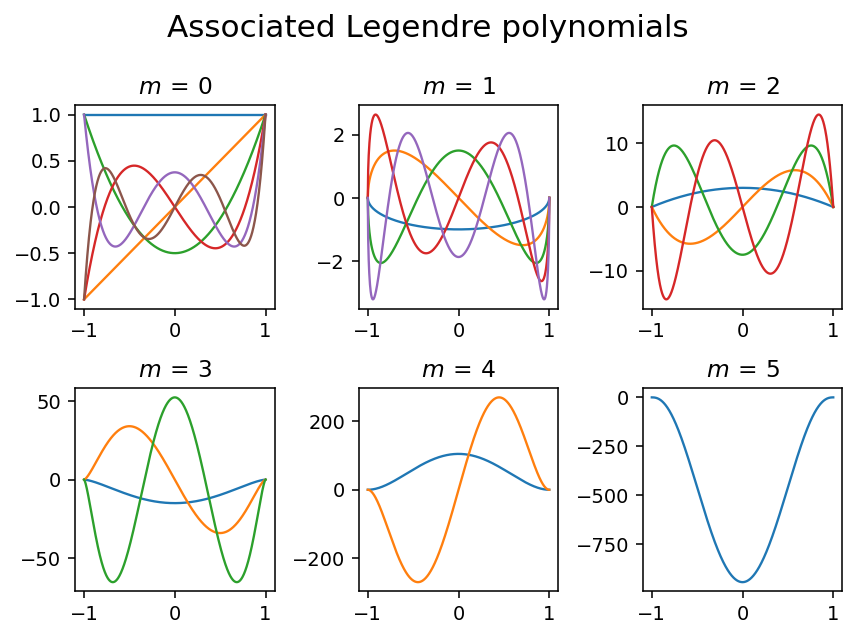

In [ ]:
if __name__ == "__main__":

  x = np.linspace (-1, 1, N)

  P = lgPmn (nmax, x)

  cols = 3
  rows = nmax // cols + 1

  fig, axs = plt.subplots (rows, cols, figsize = (6, 4), dpi = 140,
                           constrained_layout = True)
  axs = fixAxis (axs, nmax)

  m = 0

  for ax in axs:

    for n in range (m, nmax + 1):

      ax.plot (x, P[m, n], linewidth = 1.2, zorder = 3)
      ax.set_title (r'$m\,=\,{}$'.format (m))

    m += 1

  plt.suptitle ('Associated Legendre polynomials',
                fontsize = 16, y = 1.1)

  plt.show ()

####References

“Associated Legendre Polynomials.” *Wikipedia*, Wikimedia Foundation, 27 Apr. 2020, https://en.wikipedia.org/wiki/Associated_Legendre_polynomials [Accessed 15 July 2020]. 
<br>
<br>
Dahlen, F., & Tromp, J., 1998. *Theoretical global seismology.* Princeton university press, pp. 847-850.
<br>
<br>
Weisstein, Eric W. “Fourier-Legendre Series.” *From MathWorld* - A Wolfram Web Resource. https://mathworld.wolfram.com/Fourier-LegendreSeries.html [Accessed 16 July 2020]. 
<br>
<br>
Hobson, E. W., 1931. *The Theory of Spherical and Ellipsoidal Harmonics.* Cambrige University Press, p. 107.
<br>
<br>
“Markevery Demo.” Markevery Demo - Matplotlib 3.1.2 Documentation, https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/markevery_demo.html [Accessed 16 July 2020].
<br>
<br>
Wiggins, R. A., & Saito, M., 1971. *Evaluation of computational algorithms for the associated Legendre polynomials by interval analysis.* Bulletin of the Seismological Society of America, v. 61 n° 2, p. 109.
<br>
<br>